# MA943 - Numerical Methods

## Question 1: Precision of floating point arithmetic

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

1. Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

2. Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

3. Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the the allowed values of $x$.

4. Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

5. Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

6. Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

In [2]:
using Plots


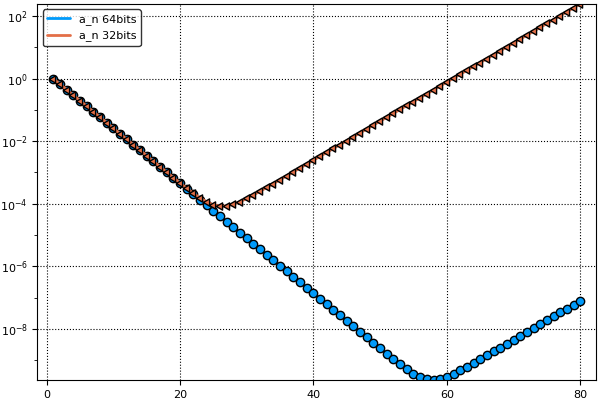

In [3]:
N=80
rec32=Array{Float32}(N)
rec32[1]=1
rec32[2]=2/3

for i=3:N
    rec32[i]=2*rec32[i-1]-(8/9)*rec32[i-2]
end


N=80
rec64=Array{Float64}(N)
rec64[1]=1
rec64[2]=2/3

for i=3:N
    rec64[i]=2*rec64[i-1]-(8/9)*rec64[i-2]
end

x=1:1:80
plot(x,rec64, yscale=:log10, markershape=:circle, linewidth=2, markersize=6, label="a_n 64bits")
plot!(x,rec32, yscale=:log10, markershape=:ltriangle, linewidth=2, markersize=6, label="a_n 32bits")

Finding a general solution to $a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

Ansatz: $a_n = \lambda^n$

We then get:

$\lambda^{n+1} = 2\, \lambda^n - \frac{8}{9}\, \lambda^{n-1} $ 

$\lambda^{n+1} - 2\, \lambda^n + \frac{8}{9}\, \lambda^{n-1} = 0$

$\lambda^{n-1}(\lambda^2 - 2\, \lambda + \frac{8}{9}\, 1) = 0$

$\Rightarrow \lambda = 0$ or $ \lambda = 1 \pm \sqrt{1-\frac{8}{9}} = 1 \pm \frac{1}{3}$

$\Rightarrow \lambda_3 = 0$, $\lambda_2 = \frac{2}{3}$, $\lambda_1 = \frac{4}{3}$

$\Rightarrow a_{n}=C_1\lambda_1^n+C_2\lambda_2^n$

$\Rightarrow a_{n}=C_1(\frac{4}{3})^n+C_2(\frac{2}{3})^n$

Using the inital conditions $a_1=1$ and $a_2=\frac{2}{3}$ we get :

$ 1 = \frac{4}{3}C_1+ \frac{2}{3}C_2$ and 

$ \frac{2}{3} = \frac{16}{9} C_1 + \frac{4}{9}C_2$

Solving this gives $C_1 = 0 $ and $C_2 = \frac{3}{2}$

Now we consider the perturbated initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. This gives the equations

$ 1 = \frac{4}{3}C_1^*+ \frac{2}{3}C_2^*$ and 

$ \frac{2}{3}+\epsilon = \frac{16}{9} C_1^* + \frac{4}{9}C_2^*$

Solving this gives $C_1^* = \frac{9}{8}\epsilon $ and $C_2^* = \frac{3}{2}(1-\frac{3}{2}\epsilon)$

We can use this to explain our numerical results !!!!!!!!!!!!!!!!!!!!!!!!!!
            


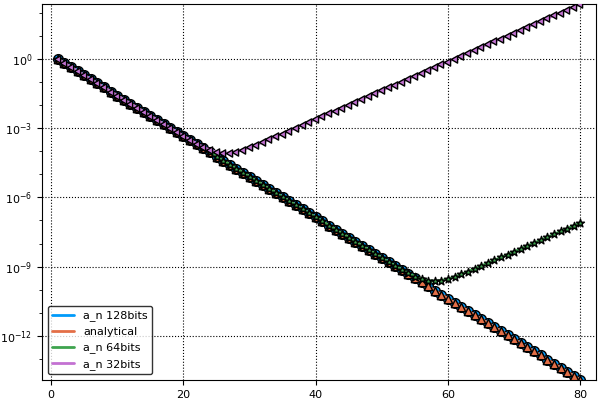

In [4]:
N=80
rec128=Array{BigFloat}(N)
rec128[1]=BigFloat(1)
rec128[2]=BigFloat(2)/BigFloat(3)

for i=3:N
    rec128[i]=BigFloat(2)*BigFloat(rec128[i-1])-(BigFloat(8)/BigFloat(9))*BigFloat(rec128[i-2])
end

x=1:1:80
plot(x,rec128, yscale=:log10, markershape=:circle, linewidth=2, markersize=7, label="a_n 128bits")

#analytical solution

rec=Array{BigFloat}(N)
rec[1]=1
rec[2]=2/3
C_1=0
C_2=3/2
λ_1=4/3
λ_2=2/3
for i=3:N
    rec[i]=C_1*(λ_1)^i+C_2*(λ_2)^i
end
plot!(x,rec, yscale=:log10, markershape=:utriangle, linewidth=2, markersize=6, label="analytical")
plot!(x,rec64, yscale=:log10, markershape=:star, linewidth=2, markersize=6, label="a_n 64bits")
plot!(x,rec32, yscale=:log10, markershape=:ltriangle, linewidth=2, markersize=6, label="a_n 32bits")

## Question 2: Computational complexity of the mergesort algorithm

Consider two arrays of integers, A and B, having lengths n and m respectively. Assuming that the elements of A and B are already sorted in ascending order. The following recursive function merges them to return an array of length n+m whose elements are sorted in ascending order:



In [5]:
function mergepresorted(A::Array{Int64,1}, B::Array{Int64,1})
    if length(A) == 0
        return B
    elseif length(B) == 0
        return A
    elseif A[1] < B[1]
        return vcat([A[1]], mergepresorted(A[2:end], B))
    else
        return vcat([B[1]], mergepresorted(A, B[2:end]))
    end    
end

mergepresorted (generic function with 1 method)

The computational complexity of this function is $n+m$.

1. Verify that the function mergepresorted(A, B) works as described.
2. Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. Verify that it works by generating some arrays of random integers and using your function to sort them.
3. Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.  
4. Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
> $b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.
5. Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).
6. Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.
7. Hence show that the computational complexity of the mergesort algorithm is
> $F(n) = O(n\, \log n)$.
8. Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

1) We want to check that the function mergepresorted works as defined above. To do that we define a function "check" that takes an array as an input, sorts it (using the built in "sort" function) and compares the input to the sorted version. If they are the same the function will tell us that the array is in correct order. We then create two random integers n and m and random arrays A and B of size n resp. m. We again use the sort function to sort each of these arrays. Then we apply the function mergepresorted to them and use the check function to make sure that the output array C is properly sorted. Our results show that the function mergepresorted works as desired.

In [6]:
##FUNCTION##FUNCTION##FUNCTION

function check(C)
    D=sort(C)
    if D==C
        println("The array is in correct order")
        else println("The array is not in corret order")
        end
    
end

check (generic function with 1 method)

In [7]:
##Check that the function works

n=rand(1:1000)
A=rand(1:10000,n)
A=sort(A)
m=rand(1:1000)
B=rand(1:10000,m)
B=sort(B)

C=mergepresorted(A,B)

##check function 

check(C)

The array is in correct order


2) We now write a recursive function that implements the mergesort algorithm. We assume that the input array is of size $n=2^m$. To verify that the function "my_mergesort" works as desired, we pick a random integer $m$ between 1 and 20 and then consider a random array of size $2^m$. We apply "my_mergesort" to this array and once again use the check function to make sure that the output is correctly sorted. The results show that the implementation of the mergesort algorithm works as desired. 

In [8]:
## use the helper function mergepresorted

function my_mergesort(A)
    n=length(A)
    if n == 1
        return A 
    else m=n/2
        m=Int(m)
        return mergepresorted(my_mergesort(A[1:m]),my_mergesort(A[m+1:n]))
    end    
end 

my_mergesort (generic function with 1 method)

In [9]:
m=rand(1:20)
n=2^m
A=rand(1:10000,n)
B=my_mergesort(A)
check(B)

The array is in correct order


3) The computational complexity of the merge sort is $F(n) = 2 F(\frac{n}{2})+n$ because if we have an array of size n, we split the it into two subproblems. Each of the subarrays has length $\frac{n}{2}$.To solve each of these problems, we need a computational effort of $F(\frac{n}{2})$, therefore we get the term $2 F(\frac{n}{2})$. In addition to that we have to consider the fact that we need to apply the "helper" function (mergepresorted) to the subproblems to get a solution in the end. As stated above, this has a computational effort of $n+m$ where $n$ is the length of array $A$ and $m$ is the length of array $B$. As both subarrays are here of size $\frac{n}{2}$, the computational effort of mergepresorted is n. So, in total, $F(n)$ needs to be $2 F(\frac{n}{2})+n$. 

4) Let $n=2^p$ and let $b_p=F(2^p)$. We can the express the recurrence relation above in terms of $b_p$:

$F(n) = 2 F(\frac{n}{2})+n  \,\,, F(1)=1 \,\,\,\, \Rightarrow F(2^p)=2F(2^{p-1})+2^p  \,\,, F(2^0)=1 \,\,\,\, \Rightarrow b_p=2b_{p-1}+2^p  \,\,, b_0=1$

5) First we want to solve the homogeneous problem $b_p=2b_{p-1}$.

$b_p=2b_{p-1}$$\,\,\,\,$ Ansatz: $b_p=x^p$

$x^p=2x^{p-1}$

Using the initial condition $b_0=1$:

$p =1 \Rightarrow \,\, 1=\frac{2}{x} \,\, \Rightarrow x=2$

Now we want to find a particular solution of the inhomogeneous problem. 

Ansatz: $b_p = pA2^p+B$

Plugging this into the formula for $b_p$ we obtained above we get 

$pA2^p=2((p-1)A2^{p-1}+B)+2^p$

$\Rightarrow pA2^p=2^p(pA-A+1)+2B$

$\Rightarrow pA=pA-A+1 \,\, \Rightarrow A=1 \,\,\,\,$ and $\,\, 2B=B \Rightarrow B=0$

So overall we get $b_p=C2^p+p2^p$

We use the initial condition $b_0=1$ to determine the value of the constant $C$:

$b_0 = 1 \,\, \Rightarrow \,\, 1=C2^0+0 \,\, \Rightarrow C=1$

So finally, $b_p=2^p(1+p)$

We now want to compute the computational complexity of the mergesort algorithm. Remember that $n=2^p$. Therefore $p=\frac{log(n)}{log(2)}$. We plug this in for p and get 

$F(n)= 2^{\frac{log(n)}{log(2)}}(1+\frac{log(n)}{log(2)})$

$F(n)= (2^{log(n)})^{\frac{1}{log(2)}}(1+\frac{log(n)}{log(2)})$

$F(n)= (n^{log(2)})^{\frac{1}{log(2)}}(1+\frac{log(n)}{log(2)})$

$F(n)= n(1+\frac{log(n)}{log(2)}) \,\,$ ~$ \,\, \mathcal{O}(n\log{}n)$ 

In [24]:
Time=zeros(15)
x=zeros(15)
for i=1:15
    x[i]=2^i
    n=2^i
    A=rand(1:10000,n)
     Time[i]=(@timed my_mergesort(A))[2]
end

In [25]:
## theoretical 

Theo=zeros(15)
for i=1:15
    n=2^i
   Theo[i]=n*log(n)*Time[1]
end



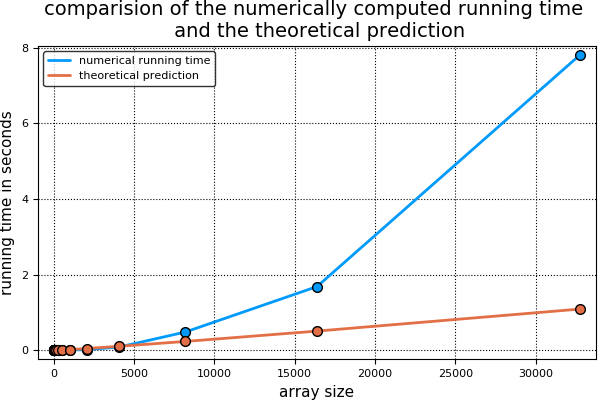

In [31]:
plot(x,Time, markershape=:circle, linewidth=2, markersize=7, label="numerical running time",ylabel="running time in seconds",xlabel="array size",title="comparision of the numerically computed running time \n and the theoretical prediction")
plot!(x,Theo, markershape=:circle, linewidth=2, markersize=7, label="theoretical prediction")